### This is a WinBUGS program for the real example in Chapter 6, Section 6.6.2.

Model: Structural Equation Model with Ordered Categorical Variables

Data Set Names: YO.dat, and XI.dat, where XI.dat are input initial values for xi.

Sample Size: N = 338

In [4]:
source(".Rprofile")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: coda

Loading required package: boot

This is cmdstanr version 0.6.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/pal_bjartan/.cmdstan/cmdstan-2.33.1

- CmdStan version: 2.33.1



#### Model with known thresholds

##### Check model

In [10]:
model  <-  paste0(getwd(), "/Chapter6/ch6-Stan-model.stan")
cmdstan_model(model, compile = FALSE)$check_syntax(pedantic = TRUE)

Warning in '/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter6/ch6-Stan-model.stan', line 42, column 18: Argument
    30 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Stan program is syntactically correct



##### Compile model

In [60]:
model <- cmdstan_model(model, 
    force_recompile = TRUE
)

##### Data Set

In [43]:
data <- list(
    N = 338, 
    P = 26,
    thd = matrix(
        c(
            -2.517,-1.245,-0.444, 0.848,
            -1.447,-0.420, 0.119, 1.245,
            -1.671,-0.869,-0.194, 0.679,
            -1.642,-0.869,-0.293, 0.332,
            -1.671,-0.827, 0.052, 0.756,
            -1.769,-1.098,-0.469, 0.255,
            -1.490,-0.670,-0.082, 0.880,
            -1.933,-0.880,-0.317, 1.008,
            -1.587,-0.624, 0.000, 1.008,
            -1.983,-1.348,-0.348, 1.045,
            -1.983,-1.229,-0.247, 0.869,
            -2.262,-1.426, 0.037, 1.330,
            -2.371,-1.295,-0.224, 0.651,
            -2.039,-1.112,-0.149, 1.169,
            -2.262,-1.198,-0.309, 1.198,
            -2.176,-1.537,-0.717, 0.597,
            -1.447,-0.786, 0.119, 1.008,
            -2.039,-1.769,-0.661, 0.642,
            -2.262,-1.468, 0.015, 1.214,
            -2.039,-1.406, 0.000, 1.140,
            -1.702,-1.058, 0.149, 0.902,
            -2.262,-1.426,-0.309, 0.971,
            -1.702,-0.615, 0.179, 1.229,
            -2.262,-1.671,-1.033, 0.420,
            -2.262,-1.468,-0.689, 1.045,
            -2.176,-1.537,-0.880, 0.661
        ),
        nrow = 26,
        ncol = 4,
        byrow = TRUE
    ),
    z = read.csv(
            "./Chapter6/ch6-WinBUGS-data.dat",
            header = FALSE,
            nrows = 338,
            skip = 2,
            strip.white = TRUE
            ) %>%
        .[,1:(ncol(.) - 1)] %>%
        as.matrix() %>%
        unname()
)

##### Two different Initial Values

In [45]:
χ_priors <- read.csv(
    "./Chapter6/ch6-WinBUGS-data.dat",
    header = FALSE,
    # nrows = 338,
    skip = 342,
    strip.white = TRUE
    ) %>%
.[,1:(ncol(.) - 1)] %>%
as.matrix() %>% 
unname()

inits <- list(
    list(
        lam = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
        psi = c(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0),
        psd = 1.0,
        gam = c(1.0, 1.0, 1.0, 1.0),
        phi = structure(
            .Data = c(1.0, 0.0, 0.0, 0.0,
                        0.0, 1.0, 0.0, 0.0,
                        0.0, 0.0, 1.0, 0.0,
                        0.0, 0.0, 0.0, 1.0),
            .Dim = c(4,4)),
        xi = χ_priors
    ),

    list(
        lam = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psi = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psd = 0.6,
        gam = c(0.0, 0.0, 0.0, 0.0),
        phi = structure(
            .Data = c(0.5, 0.0, 0.0, 0.0,
                    0.0, 0.5, 0.0, 0.0,
                    0.0, 0.0, 0.5, 0.0,
                    0.0, 0.0, 0.0, 0.5),
            .Dim = c(4,4)),
        xi = χ_priors
    )
)

##### Other model specifications

In [41]:
output_dir <-  glue::glue("{getwd()}/Chapter6/stan-output")
if( !dir.exists(output_dir) ) dir.create(output_dir)

In [61]:
fit <- model$sample(
  data = data,
  seed = 69,
  refresh = 500,
  init = inits,
  output_dir = output_dir,
  sig_figs = 5,
  chains = 2,
  parallel_chains = getOption("mc.cores", 1),
  opencl_ids = NULL,
  iter_warmup = 2000,
  iter_sampling = 8000,
  save_warmup = TRUE
)

save.image()

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: eta
 - chain 2: eta




Running MCMC with 2 chains, at most 16 in parallel...

Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is -4.1359e-25. (in '/tmp/RtmpbmSWej/model-3c7cf70be80aa.stan', line 42, column 4 to column 25)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/RtmpbmSWej/model-3c7cf70be80aa.stan', line 41, column 4 to column 22)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices

Chain 2 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is 0. (in '/tmp/RtmpbmSWej/model-3c7cf70be80aa.stan', line 42, column 4 to column 25)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/RtmpbmSWej/model-3c7cf70be80aa.stan', line 41, column 4 to column 22)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the

Chain 2 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 2 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 2 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 1 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 1 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 2 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 2 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 2 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 1 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 2 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 2 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 1 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 2 Iteration: 4000 / 10000 [ 40%]  (Sampling) 
Chain 2 Iteration: 4500 / 10000 [ 45%]  (Sampling) 
Chain 1 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 2 Iteration: 5000 / 10000 [ 50%]  (Sampling) 
Chain 2 Iteration: 5500 / 10

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




##### Fit model on GPU using OpenCL

In [5]:
# opencl_ids <- system("clinfo -l | grep 'NVIDIA'", intern = TRUE) %>%
# str_extract("\\d")

# model_CL <- cmdstan_model(
#     model, 
#     force_recompile = TRUE,
#     cpp_options = list(stan_opencl = TRUE)
# )
# model_CL$sample(
#   data = data,
#   seed = 69,
#   refresh = 500,
#   init = inits,
#   sig_figs = 5,
#   chains = n.chains,
#   parallel_chains = getOption("mc.cores", 1),
#   opencl_ids = opencl_ids,
#   iter_warmup = n.burnin,
#   iter_sampling = n.iter,
#   save_warmup = TRUE
# )

# save.image()

### Model specification with unknown thresholds

#### Check model

In [34]:
model2  <-  paste0(getwd(), "/Chapter6/ch6-Stan-model-with-unknown-thresholds.stan")
cmdstan_model(model2, compile = FALSE)$check_syntax(pedantic = TRUE)

Warning in '/home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter6/ch6-Stan-model-with-unknown-thresholds.stan', line 42, column 18: Argument
    30 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Stan program is syntactically correct



#### Compile model

In [15]:
model2 <- cmdstan_model(model2, 
    force_recompile = TRUE
)

#### Data

In [16]:
data <- list(
    N = 338, 
    P = 26,
    z = read.csv(
            "./Chapter6/ch6-WinBUGS-data.dat",
            header = FALSE,
            nrows = 338,
            skip = 2,
            strip.white = TRUE
            ) %>%
        .[,1:(ncol(.) - 1)] %>%
        as.matrix() %>%
        unname()
)

#### Priors

In [17]:
χ_priors <- read.csv(
    "./Chapter6/ch6-WinBUGS-data.dat",
    header = FALSE,
    # nrows = 338,
    skip = 342,
    strip.white = TRUE
    ) %>%
.[,1:(ncol(.) - 1)] %>%
as.matrix() %>% 
unname()

thd <- matrix(
    c(
        -2.517,-1.245,-0.444, 0.848,
        -1.447,-0.420, 0.119, 1.245,
        -1.671,-0.869,-0.194, 0.679,
        -1.642,-0.869,-0.293, 0.332,
        -1.671,-0.827, 0.052, 0.756,
        -1.769,-1.098,-0.469, 0.255,
        -1.490,-0.670,-0.082, 0.880,
        -1.933,-0.880,-0.317, 1.008,
        -1.587,-0.624, 0.000, 1.008,
        -1.983,-1.348,-0.348, 1.045,
        -1.983,-1.229,-0.247, 0.869,
        -2.262,-1.426, 0.037, 1.330,
        -2.371,-1.295,-0.224, 0.651,
        -2.039,-1.112,-0.149, 1.169,
        -2.262,-1.198,-0.309, 1.198,
        -2.176,-1.537,-0.717, 0.597,
        -1.447,-0.786, 0.119, 1.008,
        -2.039,-1.769,-0.661, 0.642,
        -2.262,-1.468, 0.015, 1.214,
        -2.039,-1.406, 0.000, 1.140,
        -1.702,-1.058, 0.149, 0.902,
        -2.262,-1.426,-0.309, 0.971,
        -1.702,-0.615, 0.179, 1.229,
        -2.262,-1.671,-1.033, 0.420,
        -2.262,-1.468,-0.689, 1.045,
        -2.176,-1.537,-0.880, 0.661
    ),
    nrow = 26,
    ncol = 4,
    byrow = TRUE
)

inits <- list(
    list(
        lam = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
        psi = c(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0),
        psd = 1.0,
        gam = c(1.0, 1.0, 1.0, 1.0),
        phi = structure(
            .Data = c(1.0, 0.0, 0.0, 0.0,
                        0.0, 1.0, 0.0, 0.0,
                        0.0, 0.0, 1.0, 0.0,
                        0.0, 0.0, 0.0, 1.0),
            .Dim = c(4,4)),
        xi = χ_priors,
        thd = thd
        
    ),

    list(
        lam = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psi = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psd = 0.6,
        gam = c(0.0, 0.0, 0.0, 0.0),
        phi = structure(
            .Data = c(0.5, 0.0, 0.0, 0.0,
                    0.0, 0.5, 0.0, 0.0,
                    0.0, 0.0, 0.5, 0.0,
                    0.0, 0.0, 0.0, 0.5),
            .Dim = c(4,4)),
        xi = χ_priors,
        thd = thd
    )
)

In [18]:
fit2 <- model2$sample(
  data = data,
  seed = 69,
  refresh = 500,
  init = inits,
  output_dir = output_dir,
  sig_figs = 5,
  chains = n.chains,
  parallel_chains = getOption("mc.cores", 1),
  opencl_ids = NULL,
  iter_warmup = n.burnin,
  iter_sampling = n.iter,
  save_warmup = TRUE
)

save.image()

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: eta
 - chain 2: eta




Running MCMC with 2 chains, at most 16 in parallel...

Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is -1.22197e-150. (in '/tmp/RtmpCiNGEU/model-102b13ffdb58.stan', line 42, column 4 to column 25)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is -3.81867e-152. (in '/tmp/RtmpCiNGEU/model-102b13ffdb58.stan', line 42, column 4 to column 25)

Chain 1 If this warning occurs sporadically, such as for highl

Chain 2 Iteration:    1 / 10000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is 0. (in '/tmp/RtmpCiNGEU/model-102b13ffdb58.stan', line 42, column 4 to column 25)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: wishart_lpdf: LDLT_Factor of random variable is not positive definite.  last conditional variance is 0. (in '/tmp/RtmpCiNGEU/model-102b13ffdb58.stan', line 42, column 4 to column 25)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable t

Chain 1 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 2 Iteration:  500 / 10000 [  5%]  (Warmup) 
Chain 1 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 1 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 1 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 2 Iteration: 1000 / 10000 [ 10%]  (Warmup) 
Chain 1 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 2 Iteration: 1500 / 10000 [ 15%]  (Warmup) 
Chain 2 Iteration: 2000 / 10000 [ 20%]  (Warmup) 
Chain 2 Iteration: 2001 / 10000 [ 20%]  (Sampling) 
Chain 1 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 2 Iteration: 2500 / 10000 [ 25%]  (Sampling) 
Chain 1 Iteration: 4000 / 10000 [ 40%]  (Sampling) 
Chain 2 Iteration: 3000 / 10000 [ 30%]  (Sampling) 
Chain 1 Iteration: 4500 / 10000 [ 45%]  (Sampling) 
Chain 2 Iteration: 3500 / 10000 [ 35%]  (Sampling) 
Chain 1 Iteration: 5000 / 10000 [ 50%]  (Sampling) 
Chain 2 Iteration: 4000 / 10

See https://mc-stan.org/misc/warnings for details.




### Convergence

In [21]:
parameters <- c("lam", "psi", "gam", "phi", "xi") # Parameters to monitor

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”
Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


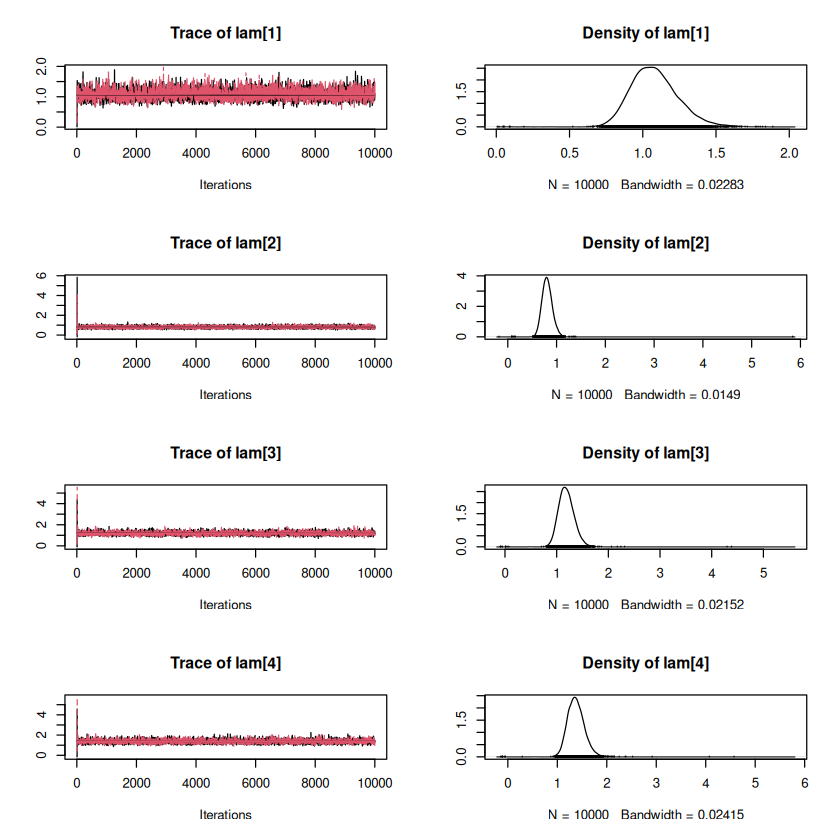

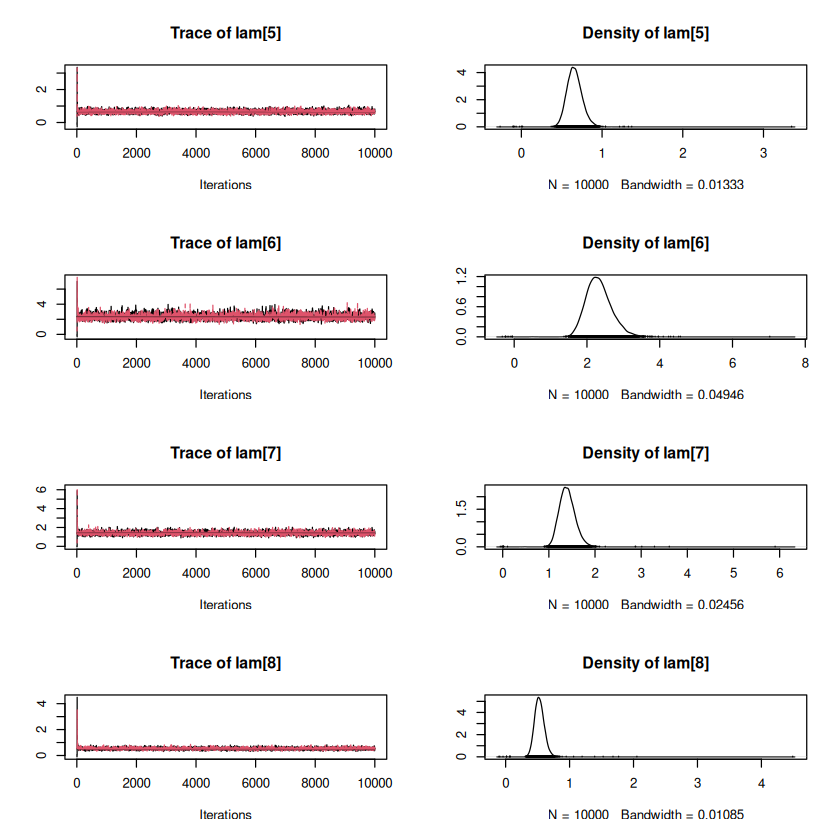

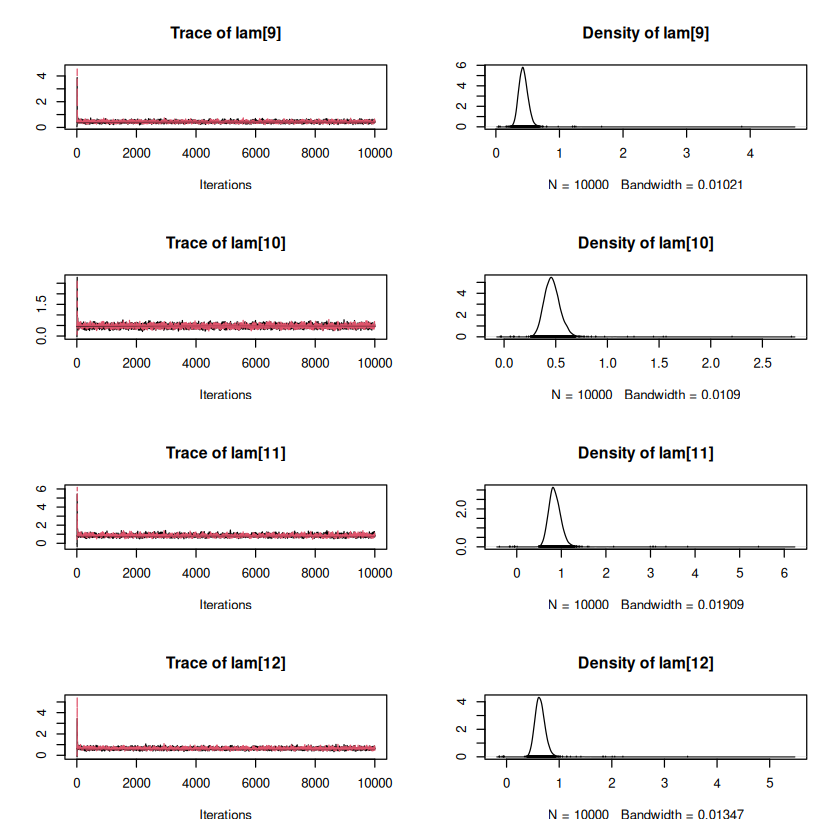

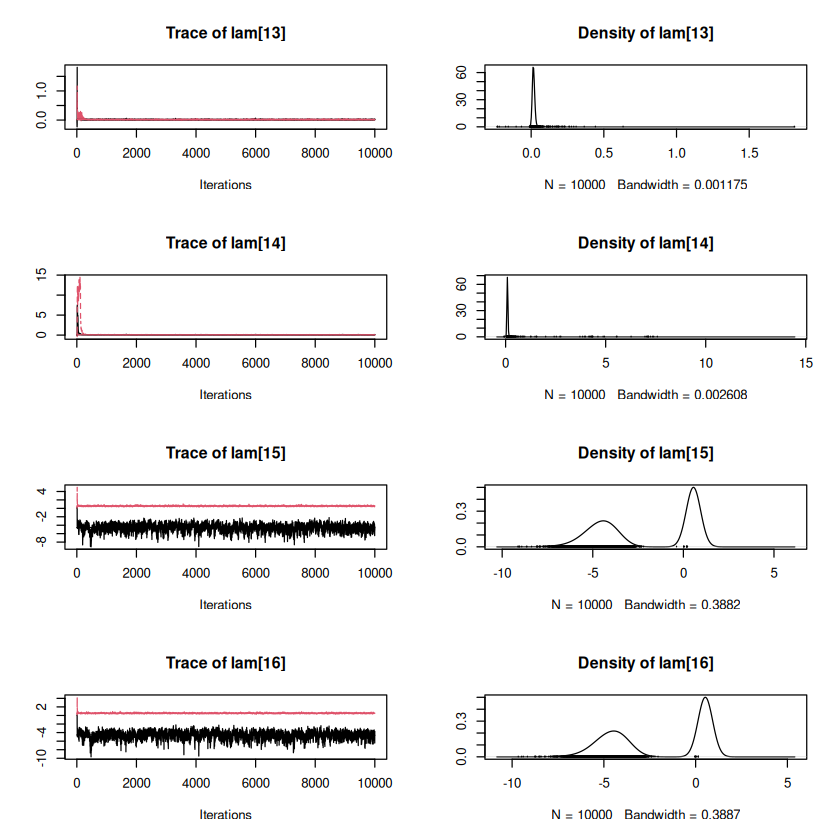

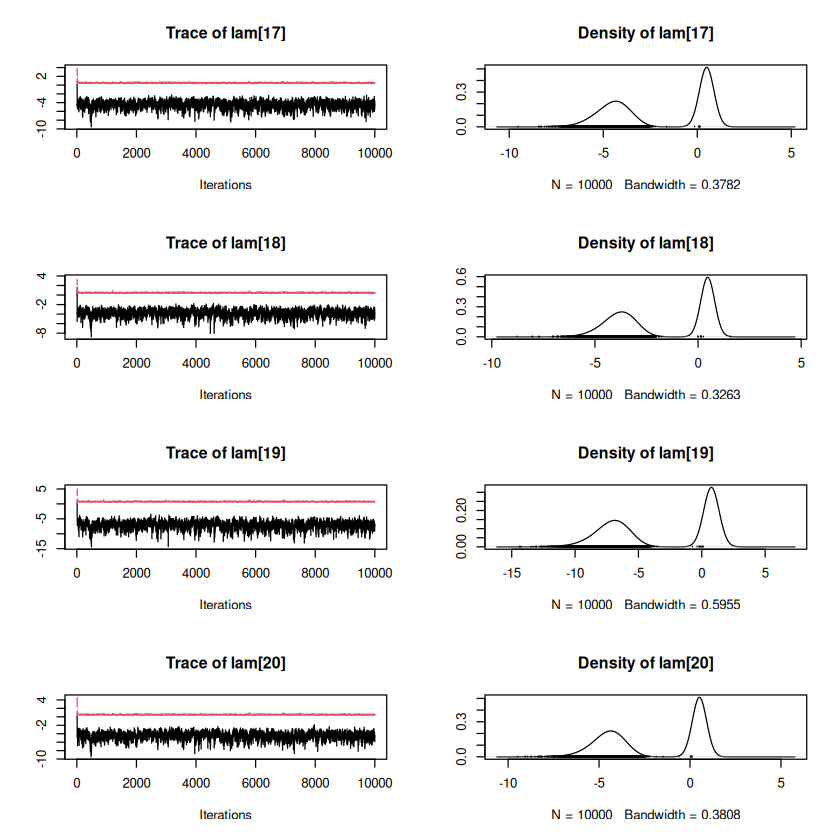

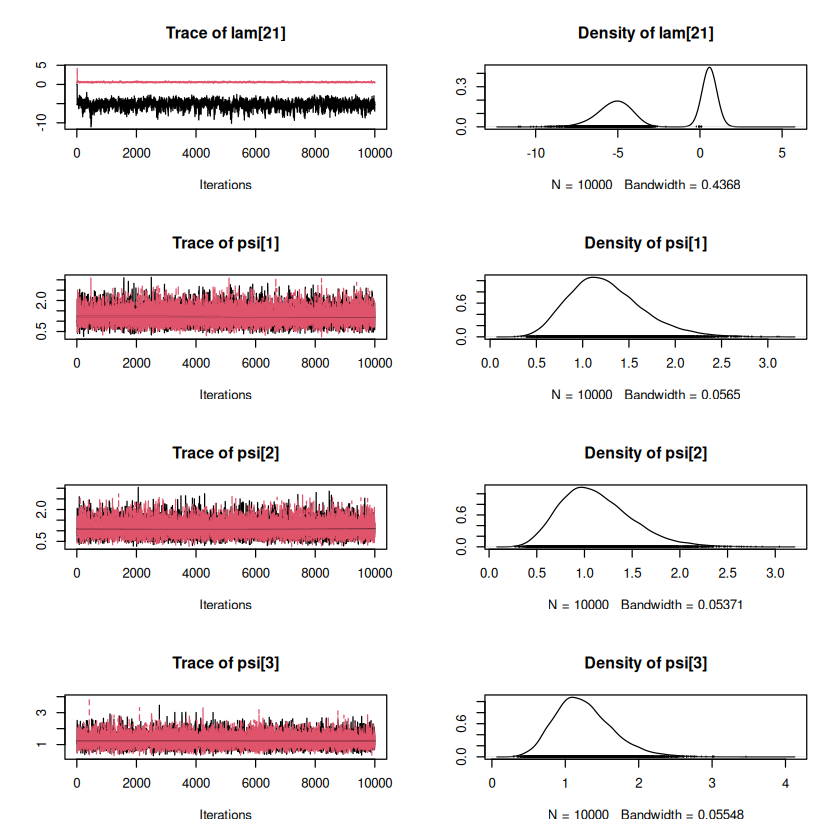

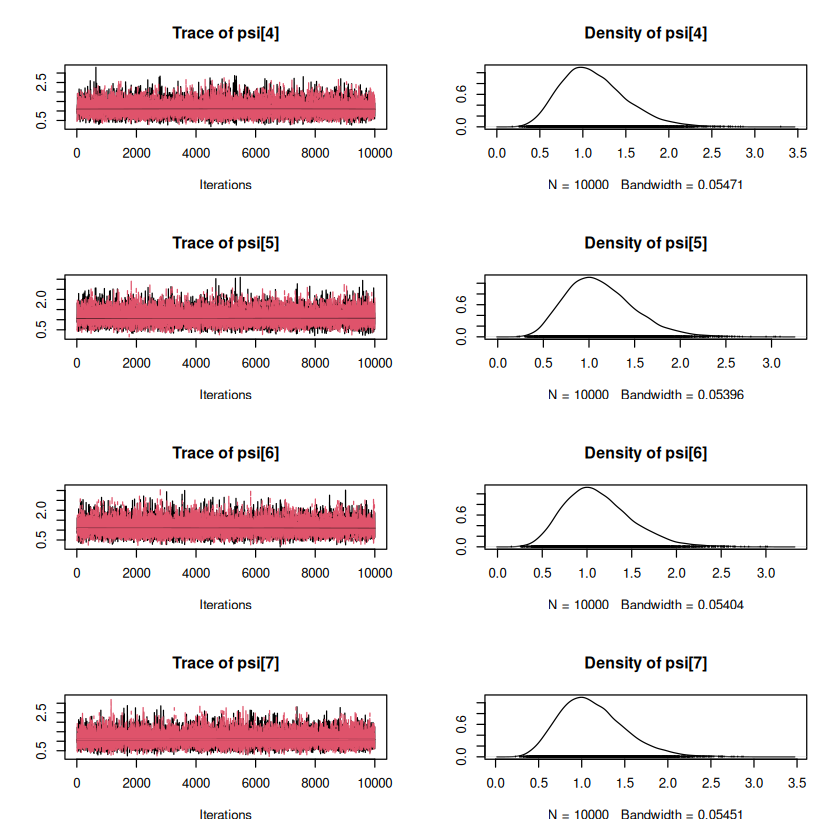

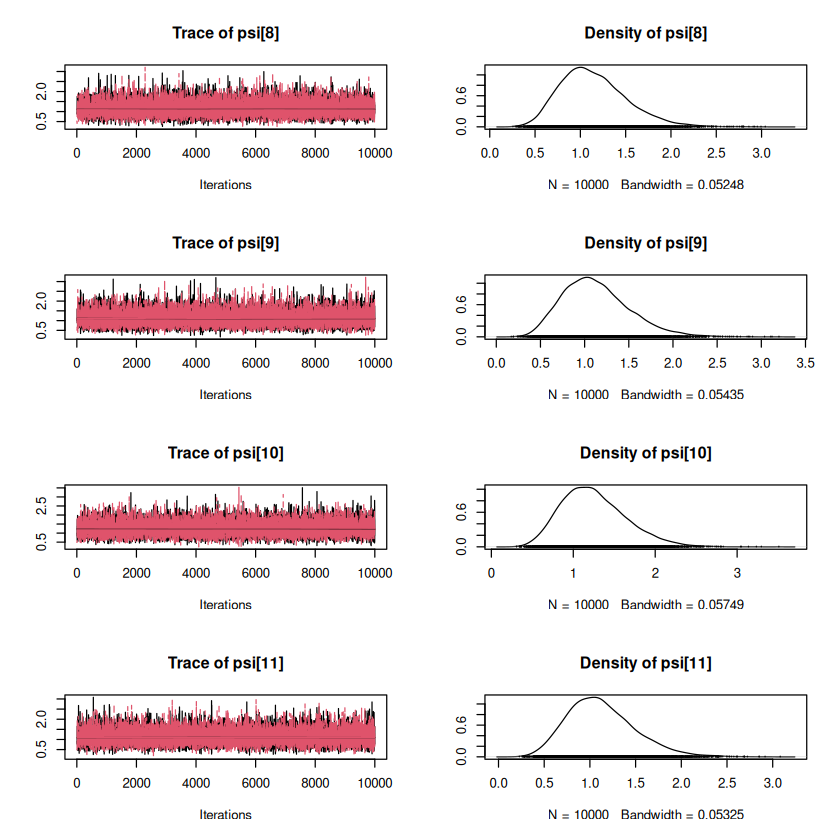

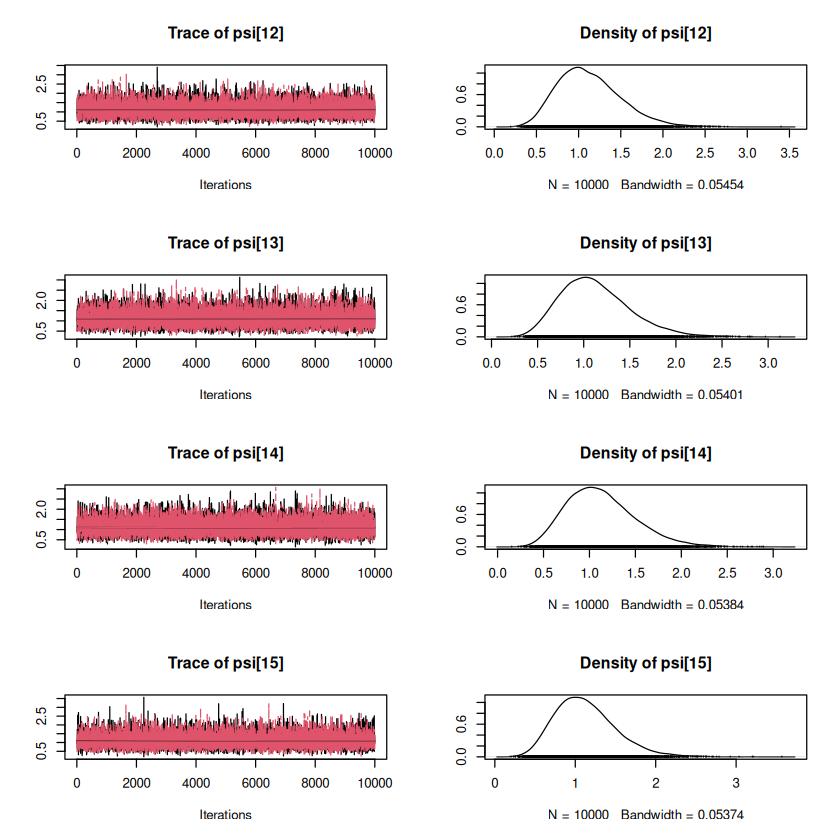

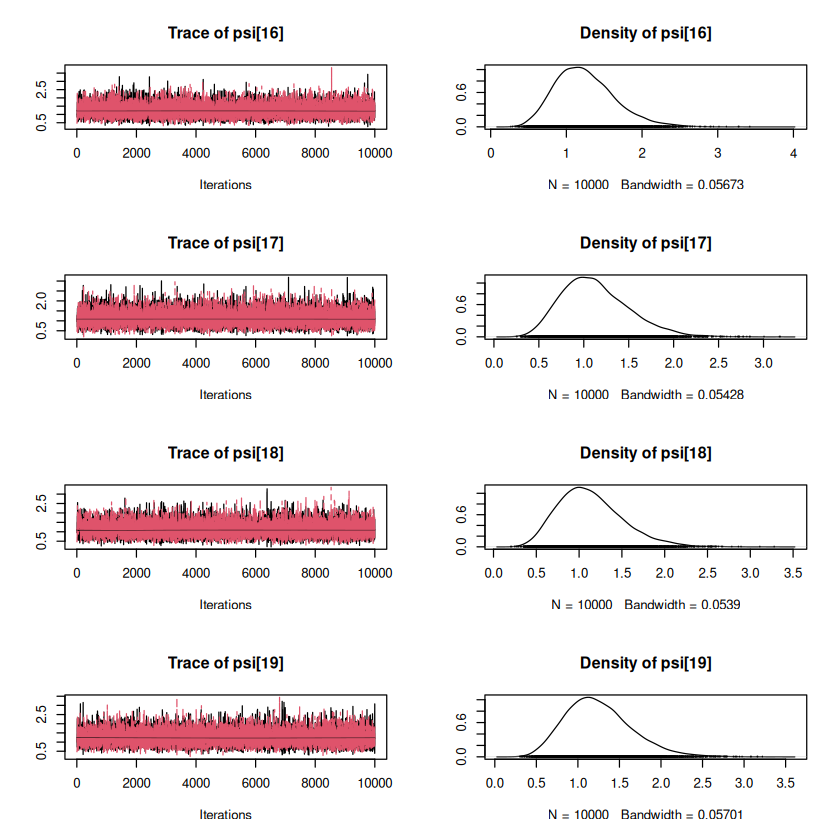

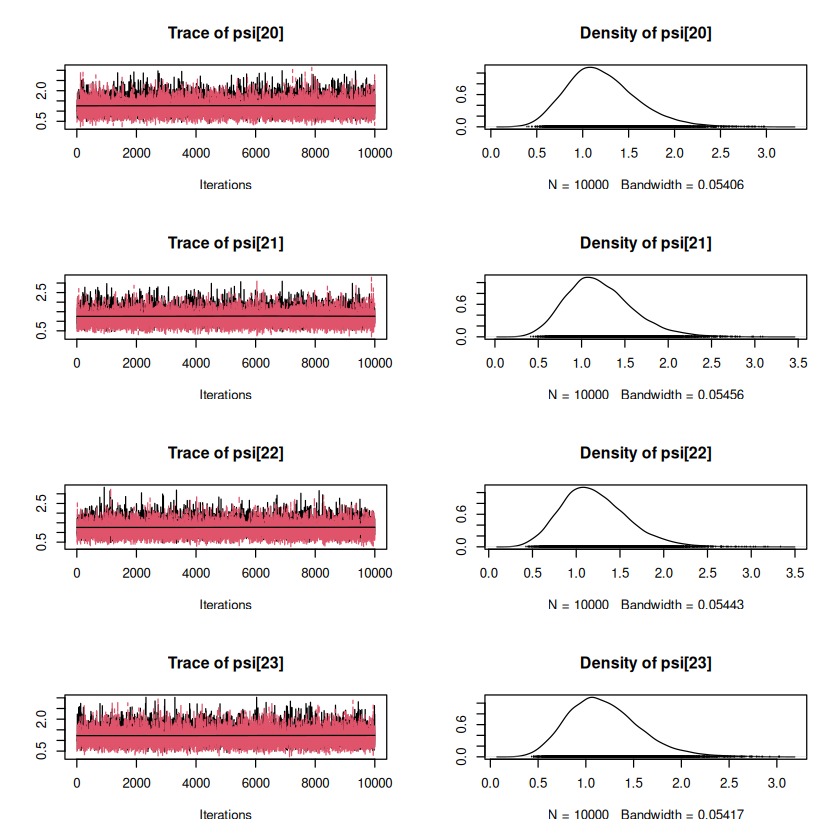

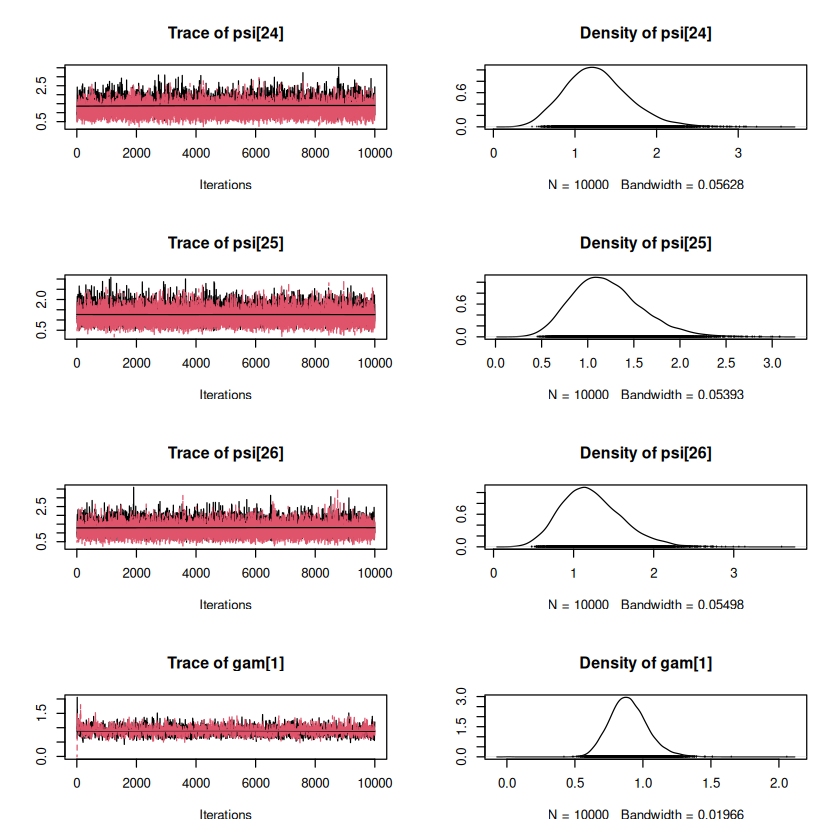

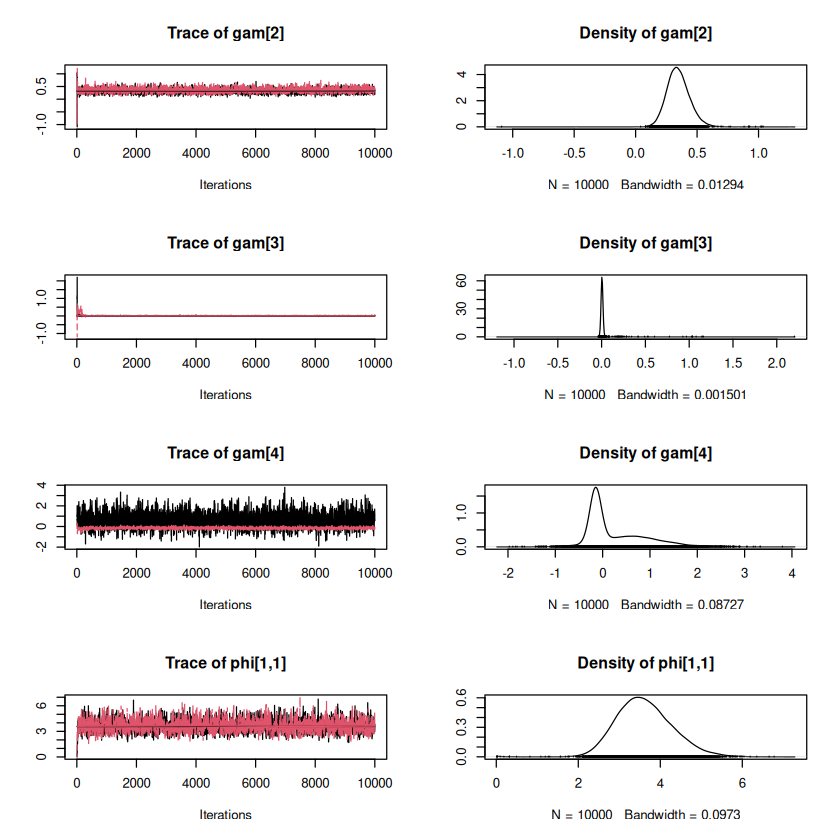

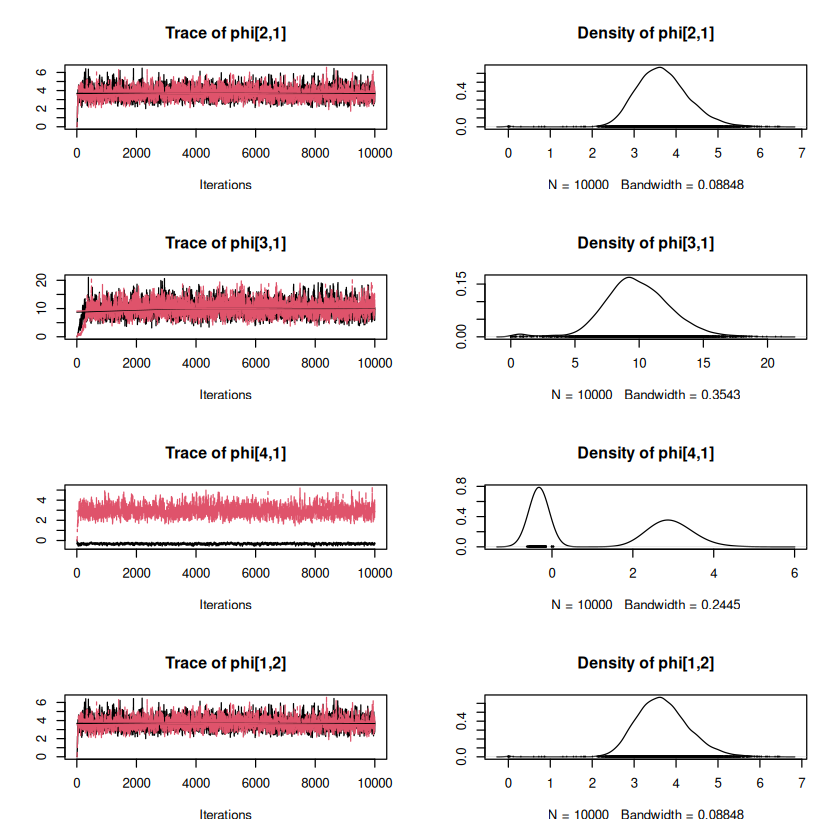

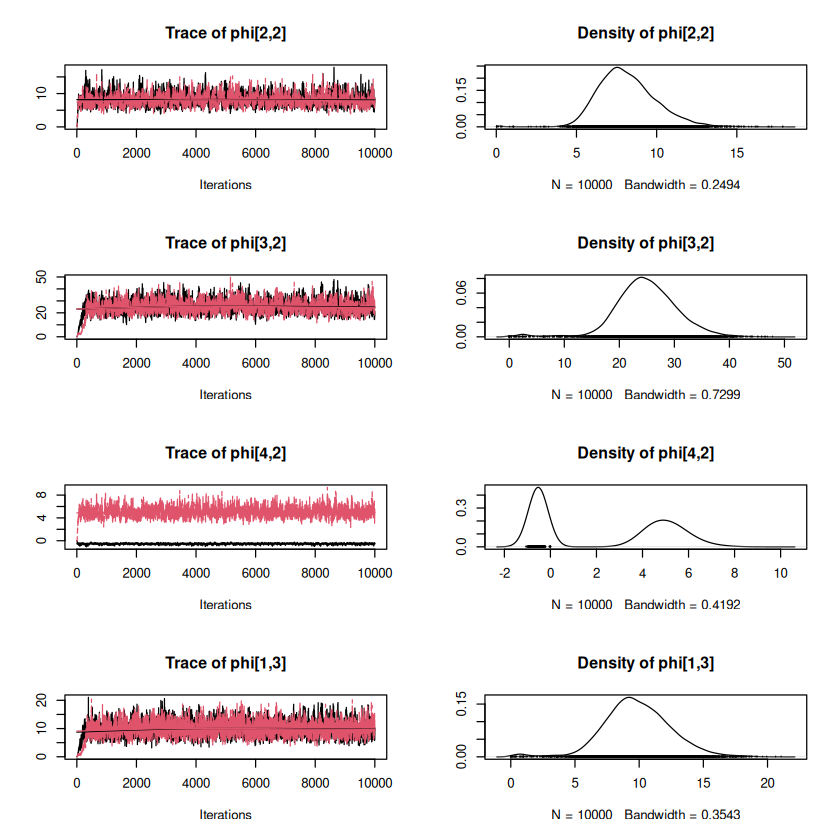

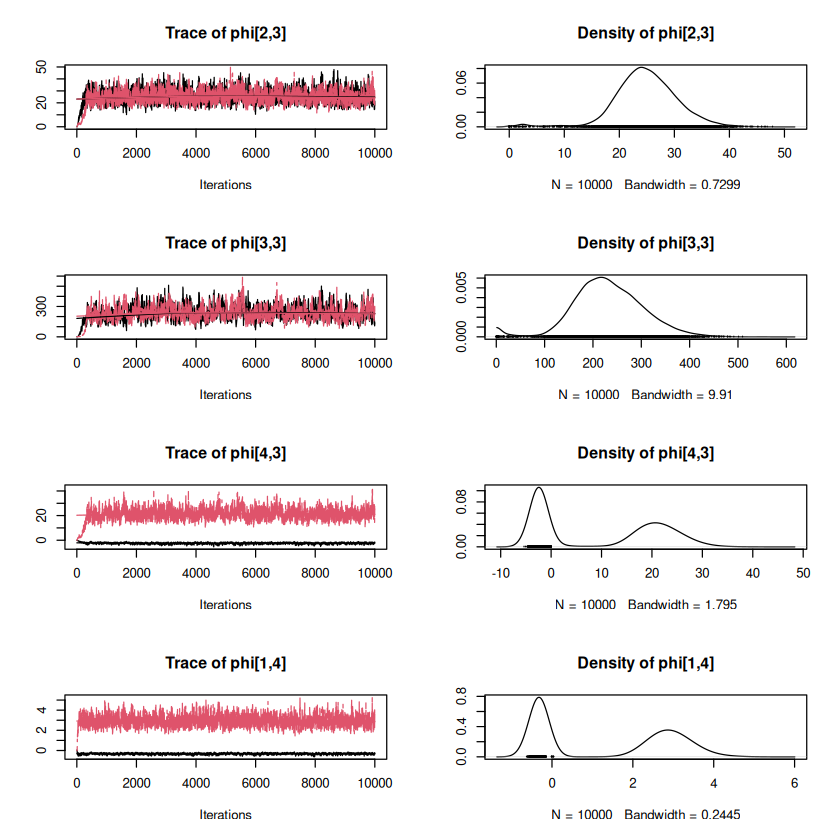

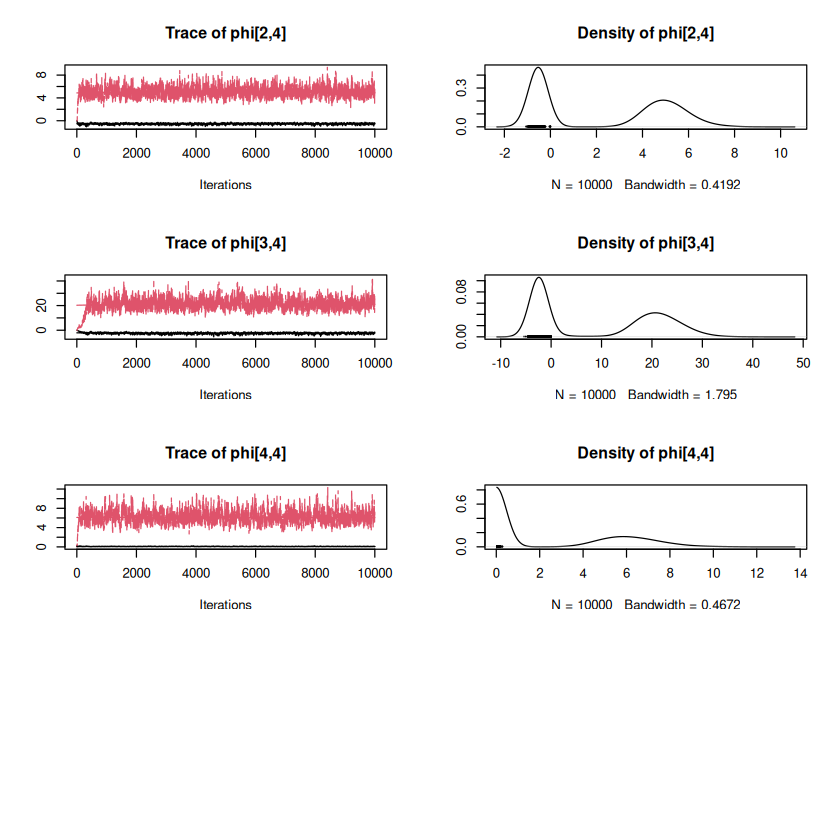

In [44]:
# Extract posterior draws for variables of interest.
fit2$draws(
    variables = param[-5],
    inc_warmup = TRUE,
    format = "df"
) %>% 
# Split data frame into list of dataframes by chain number.
split(f = .$.chain) %>% 
# Drop unneeded variables and convert to MCMC object.
lapply(
    function(x) {
        select(x, -c(".chain", ".iteration", ".draw")) %>%
        mcmc()
    }
)  %>%
# Plot posterior draws
mcmc.list() %>%
plot()

In [ ]:
posterior2 <- extract(fit2, inc_warmup = TRUE, permuted = FALSE)

In [107]:
draws <- fit2$draws(
    variables = param[-5],
    inc_warmup = TRUE,
    format = "df"
)
pars <- grep("lam", names(draws), value = TRUE)#names(draws)  %>% 
# .[!. %in% c('.chain', '.iteration', '.draw')]

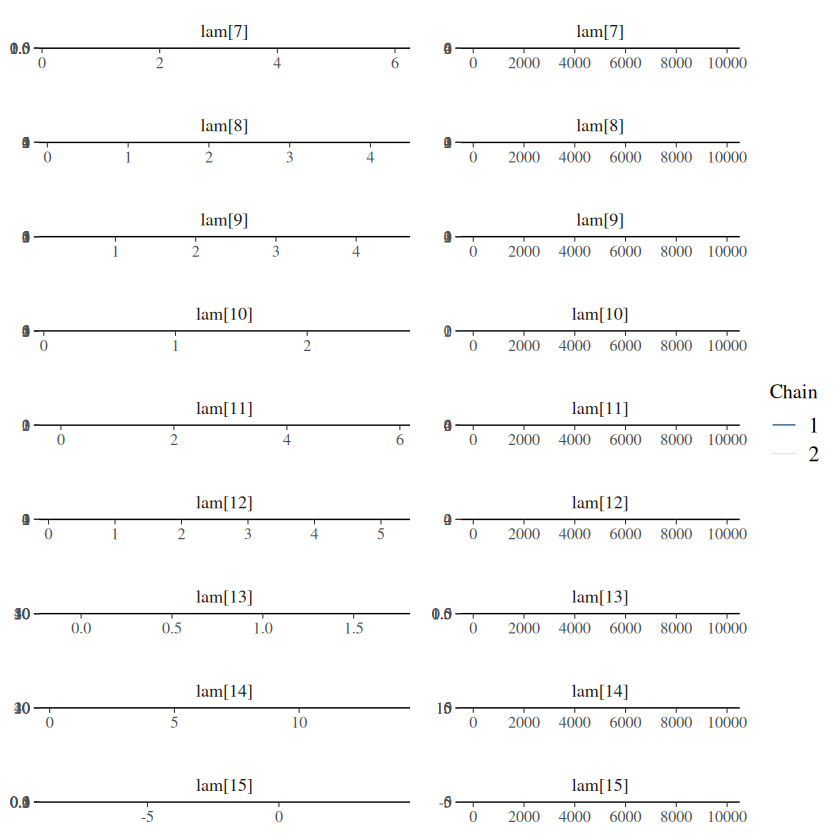

In [108]:
mcmc_combo(draws, pars = pars)

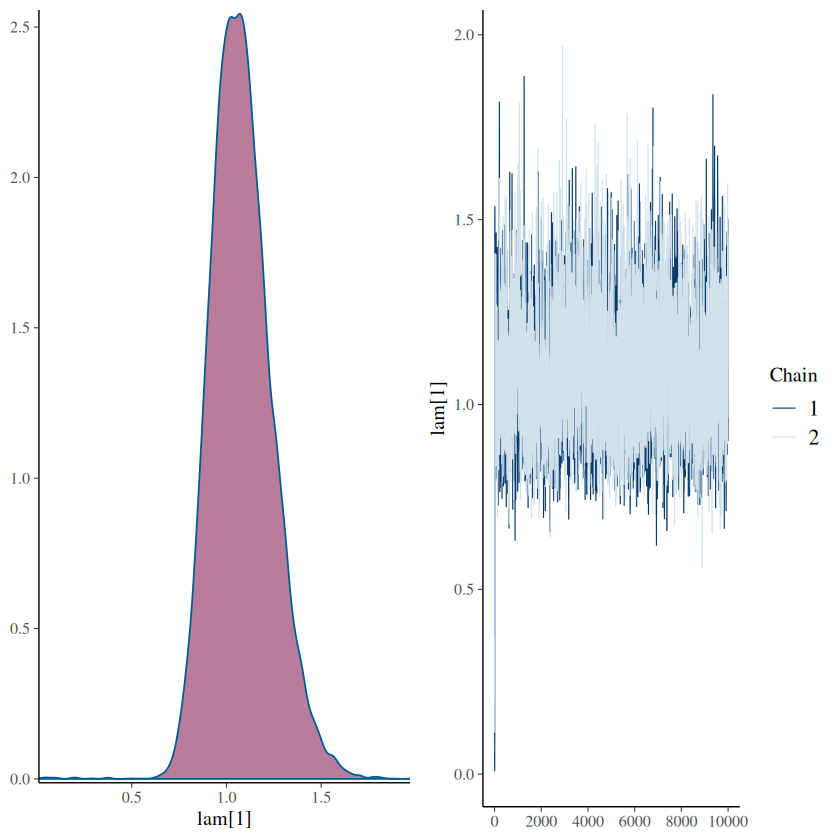

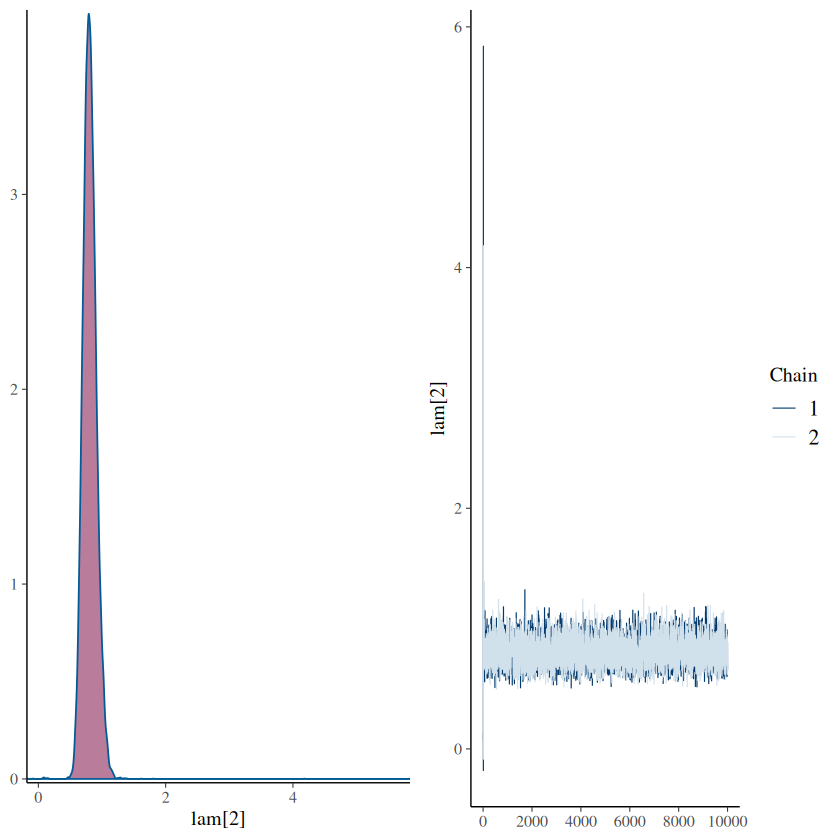

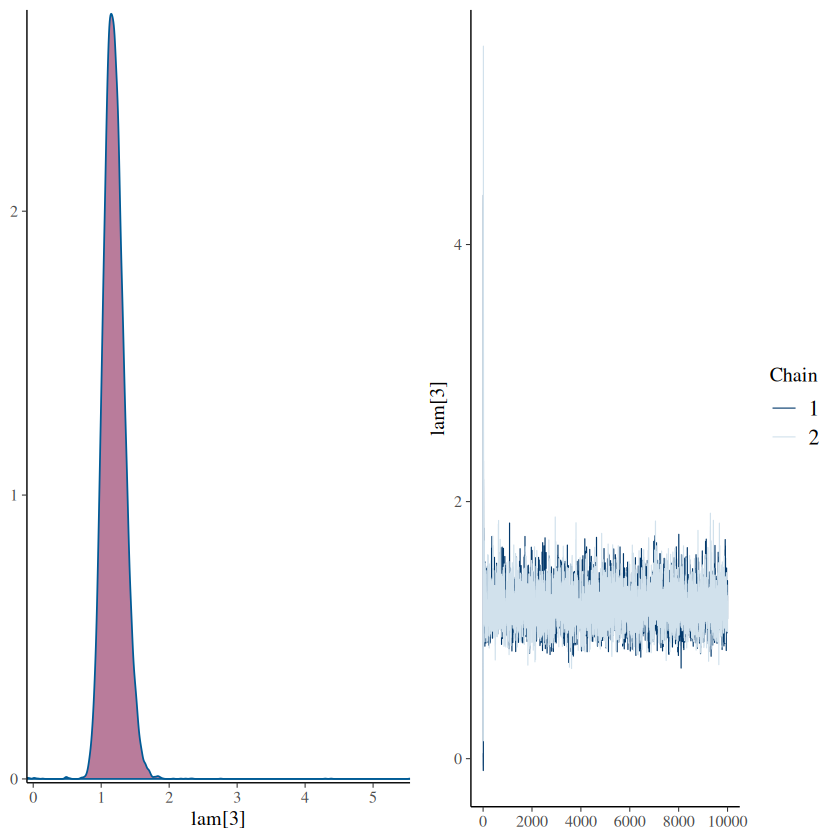

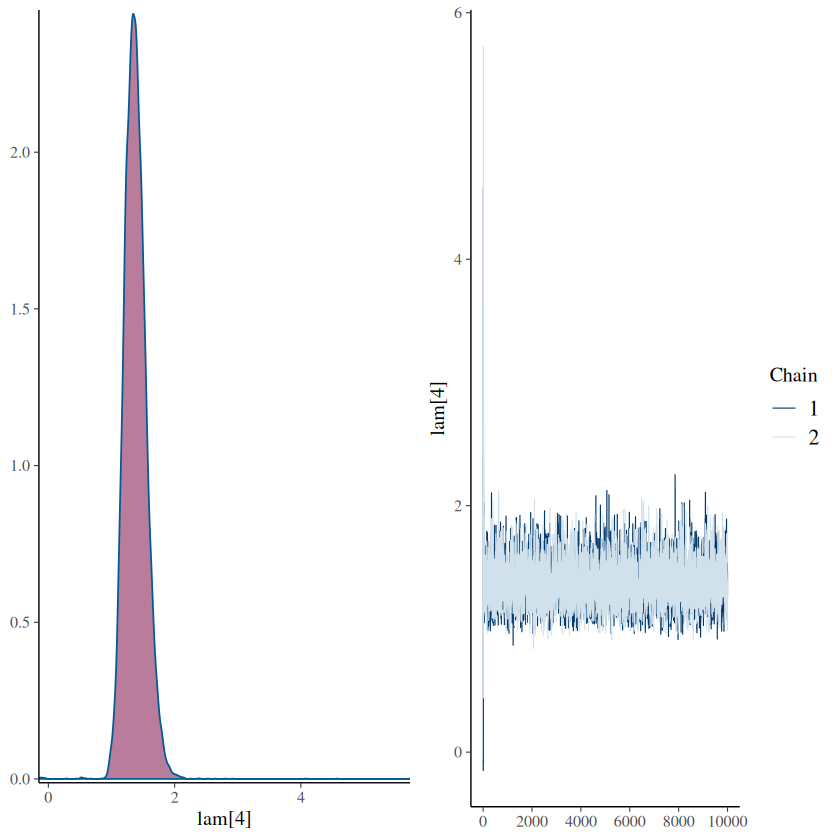

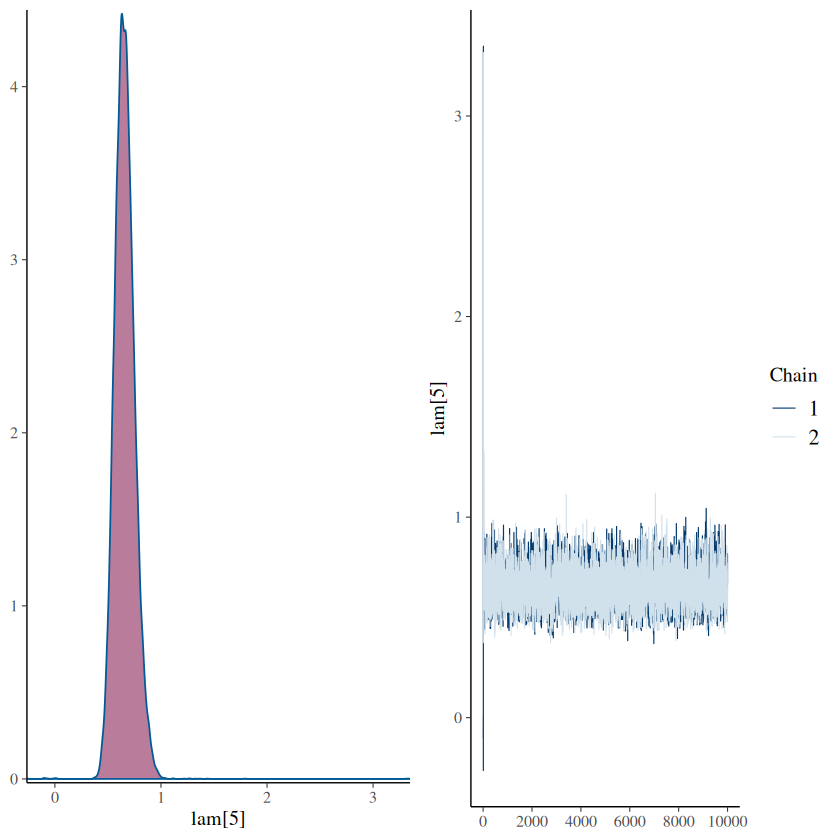

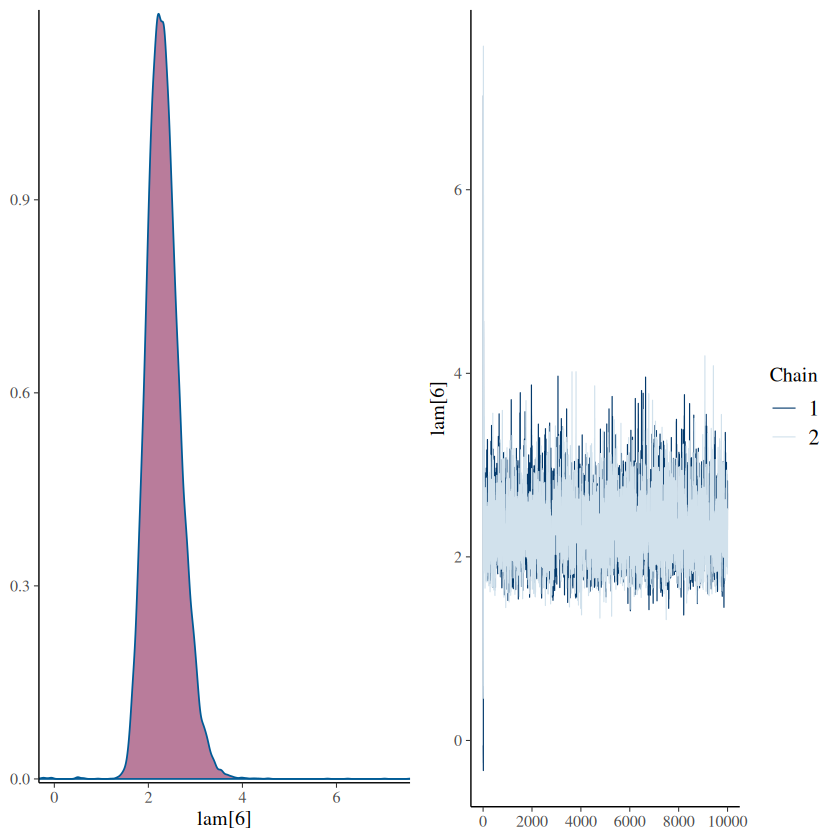

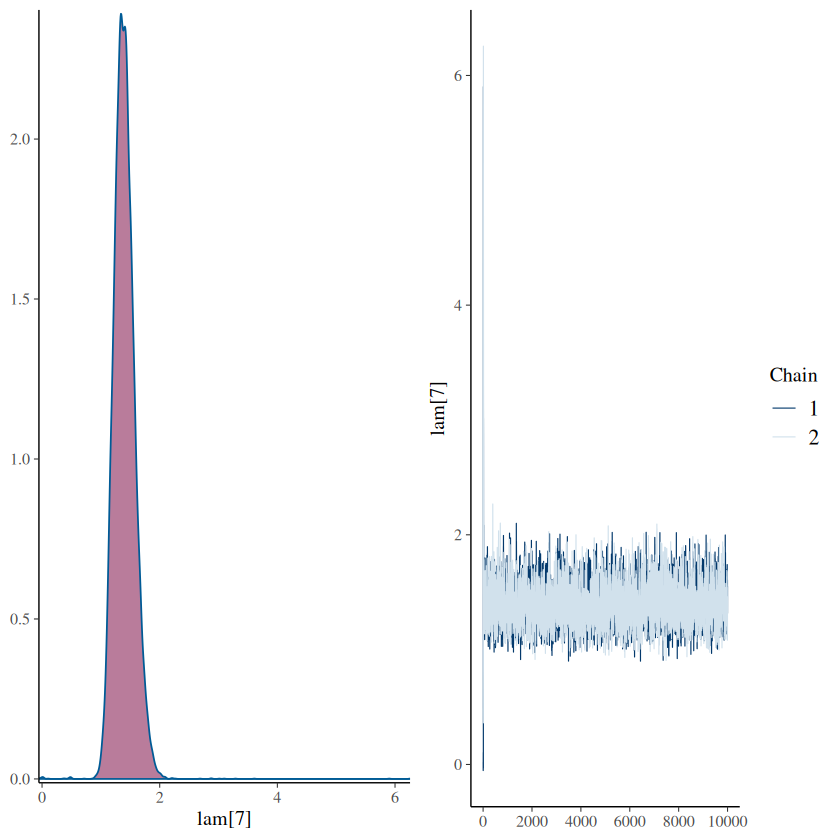

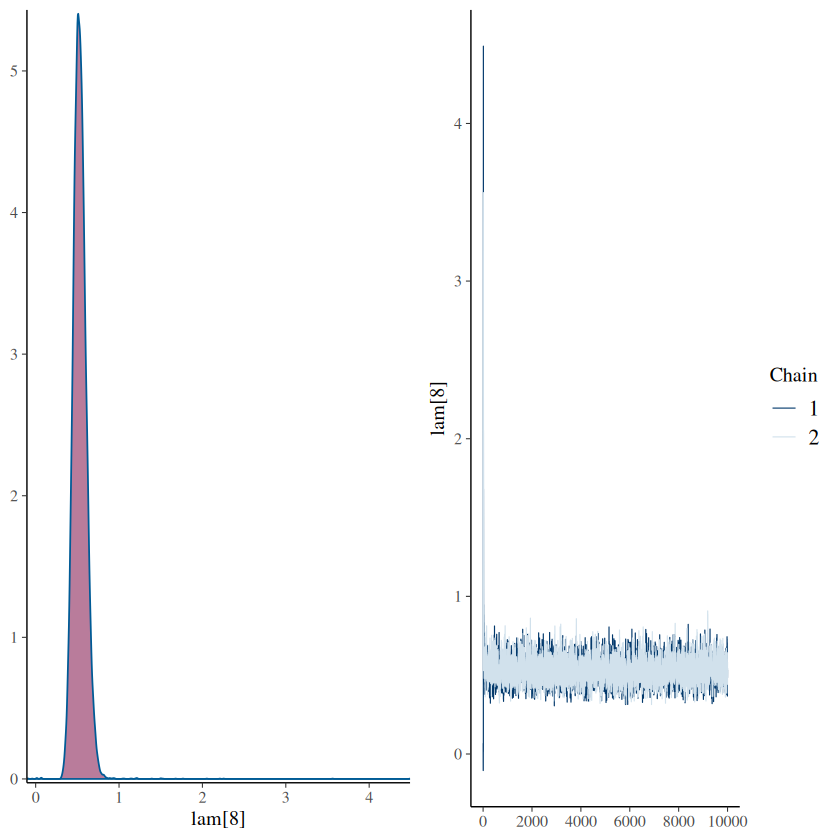

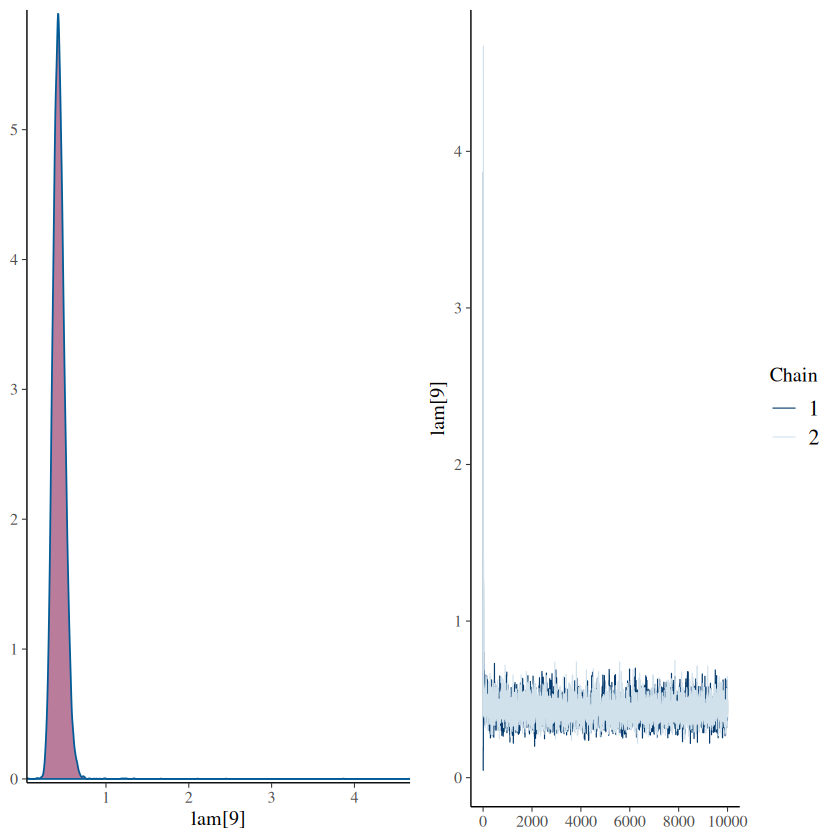

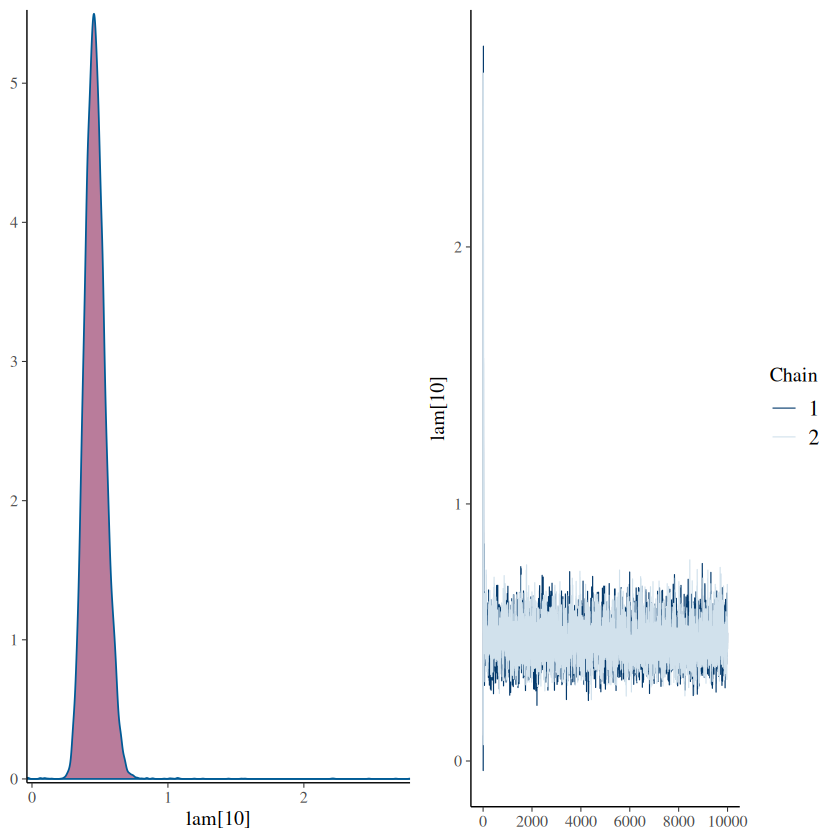

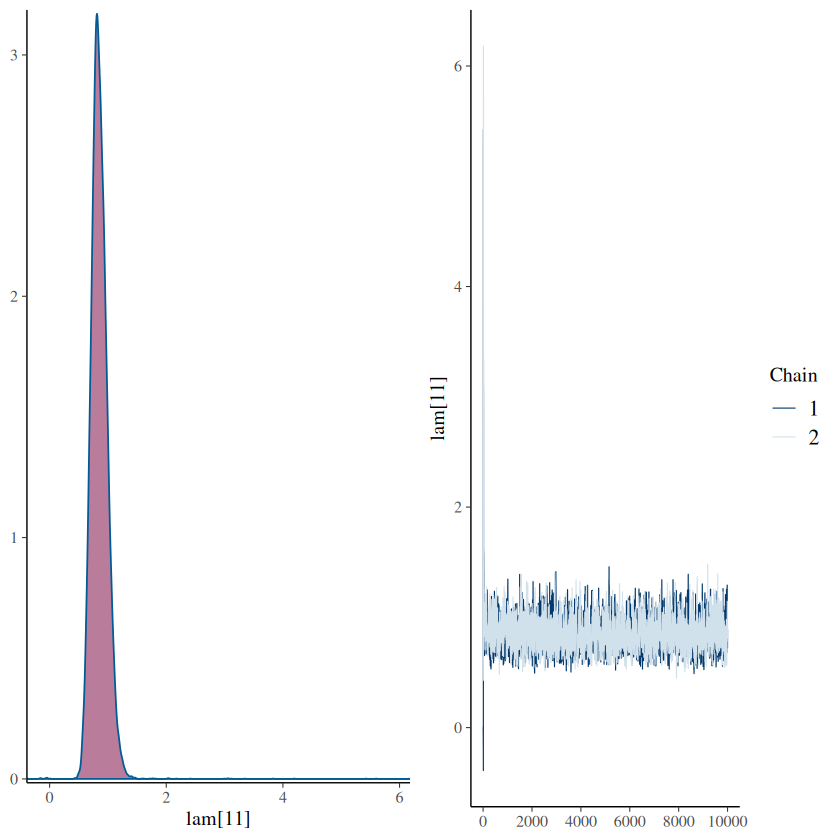

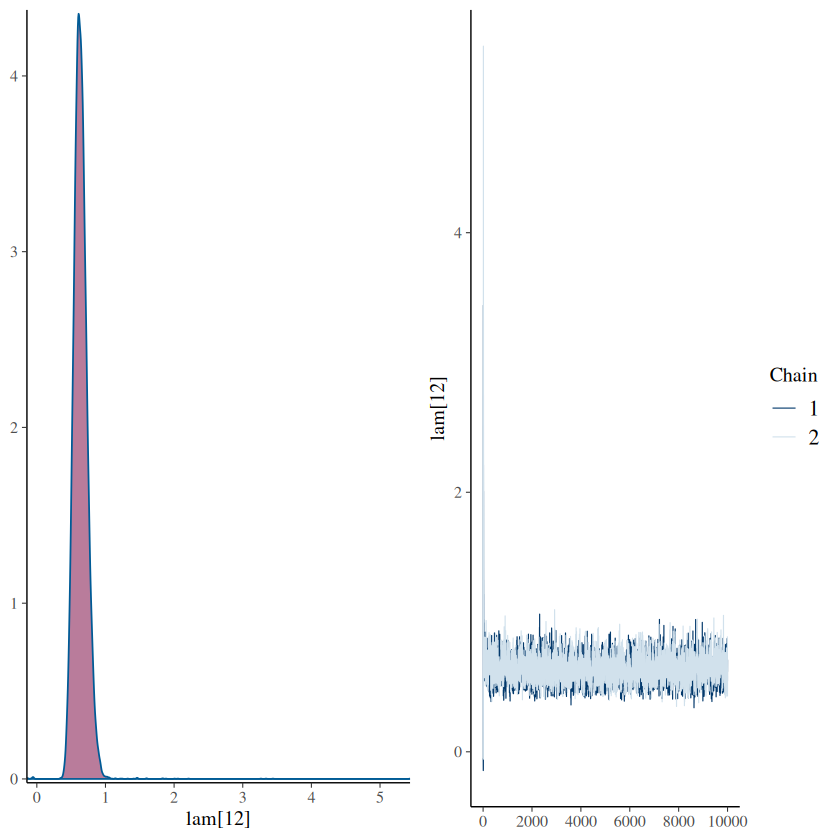

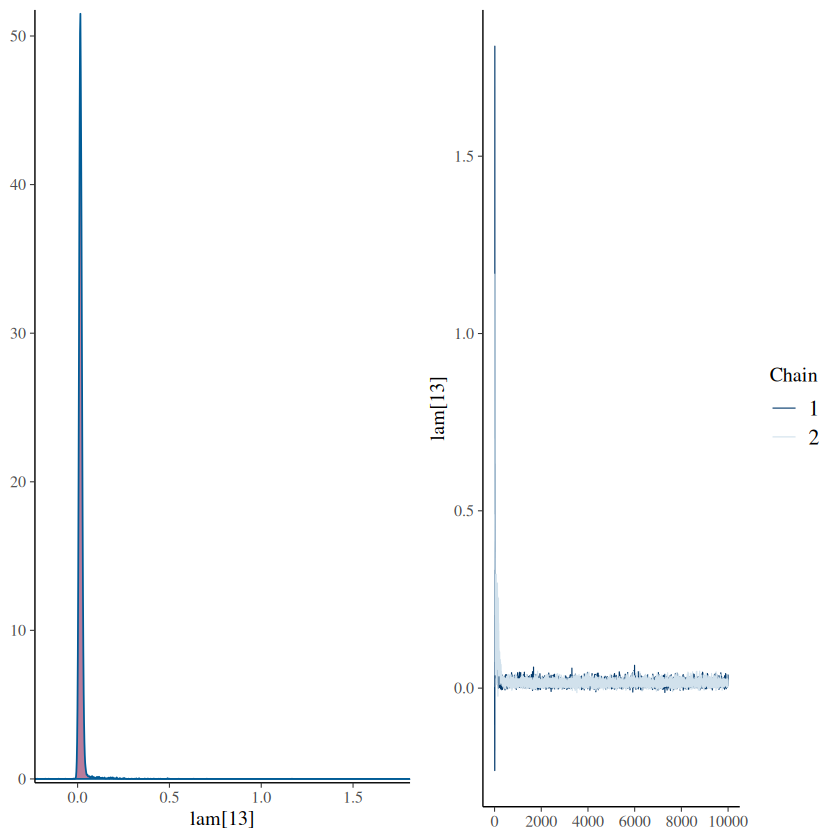

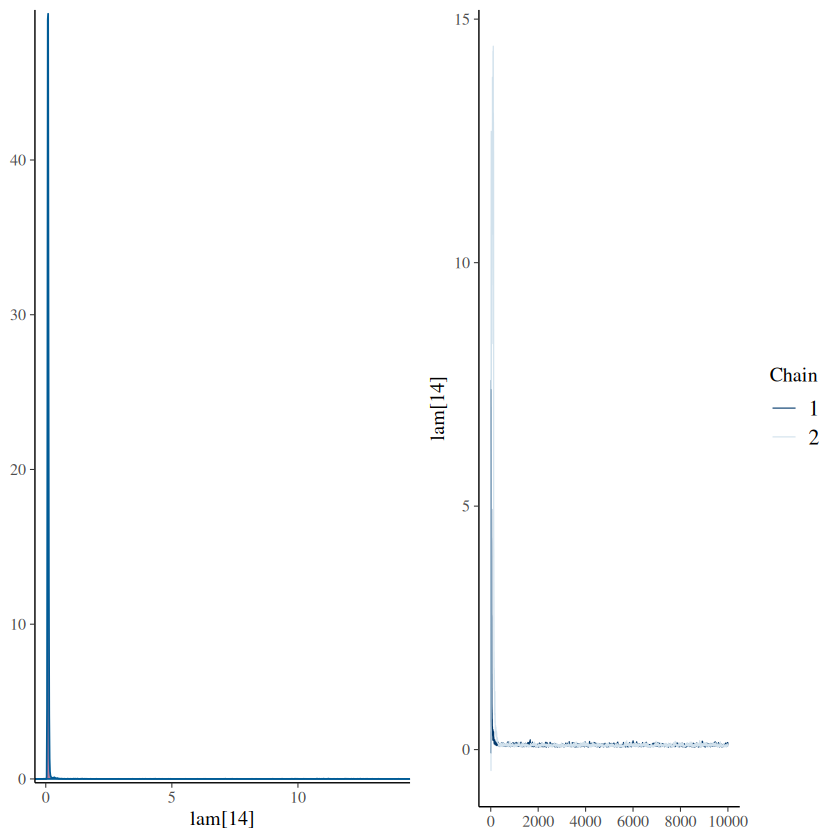

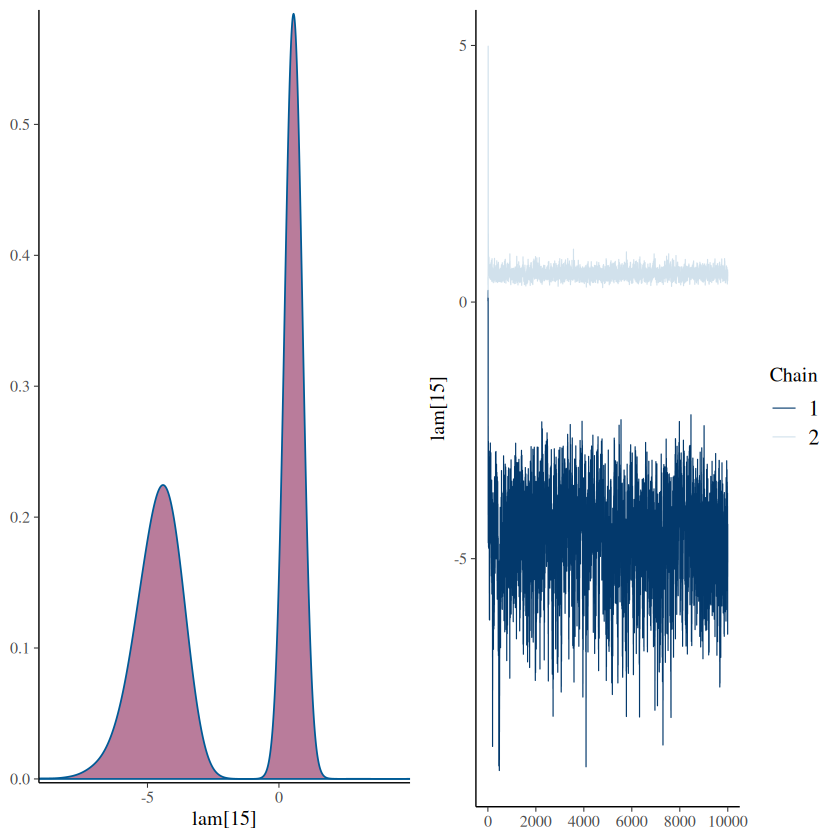

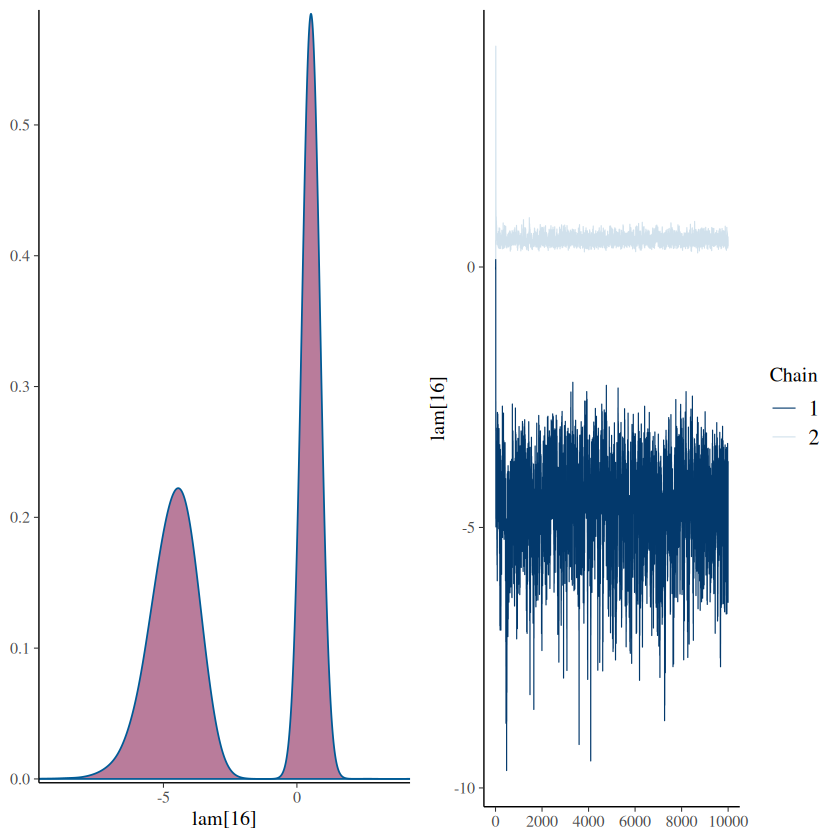

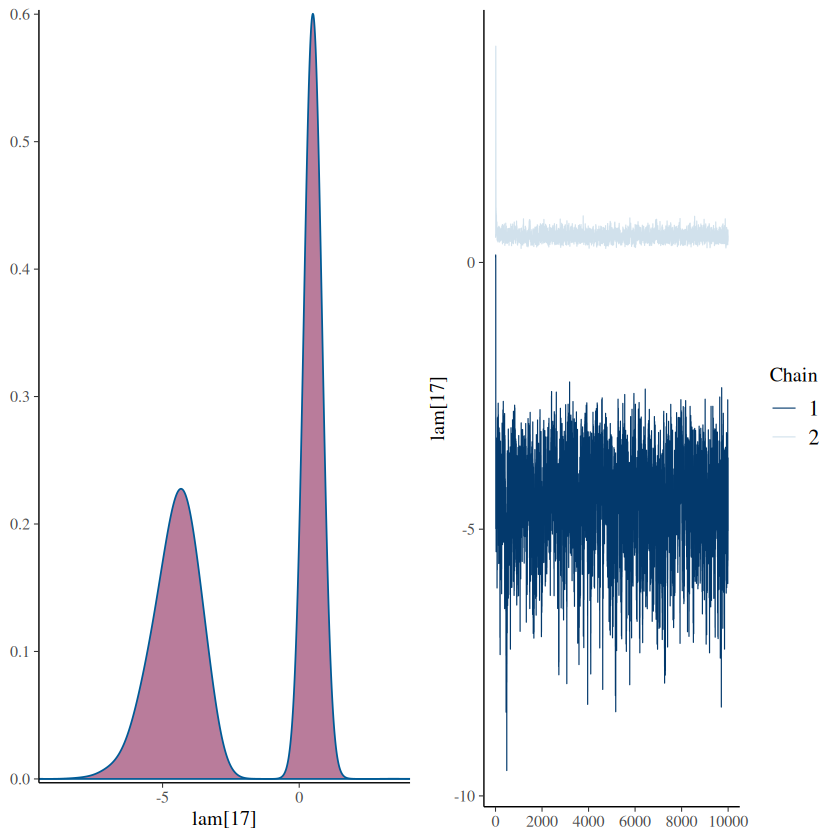

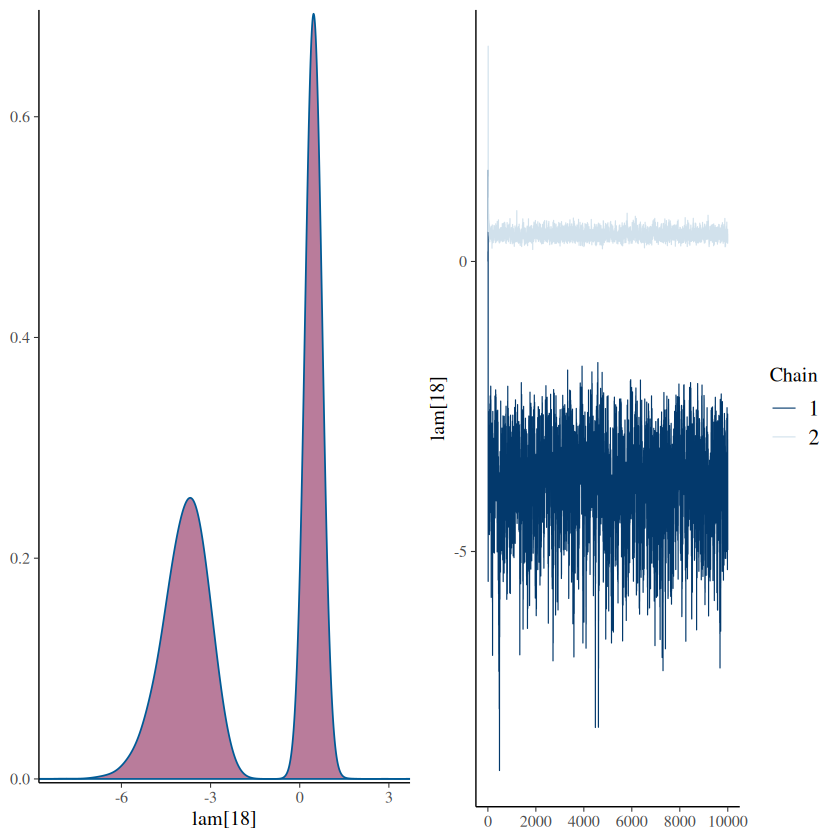

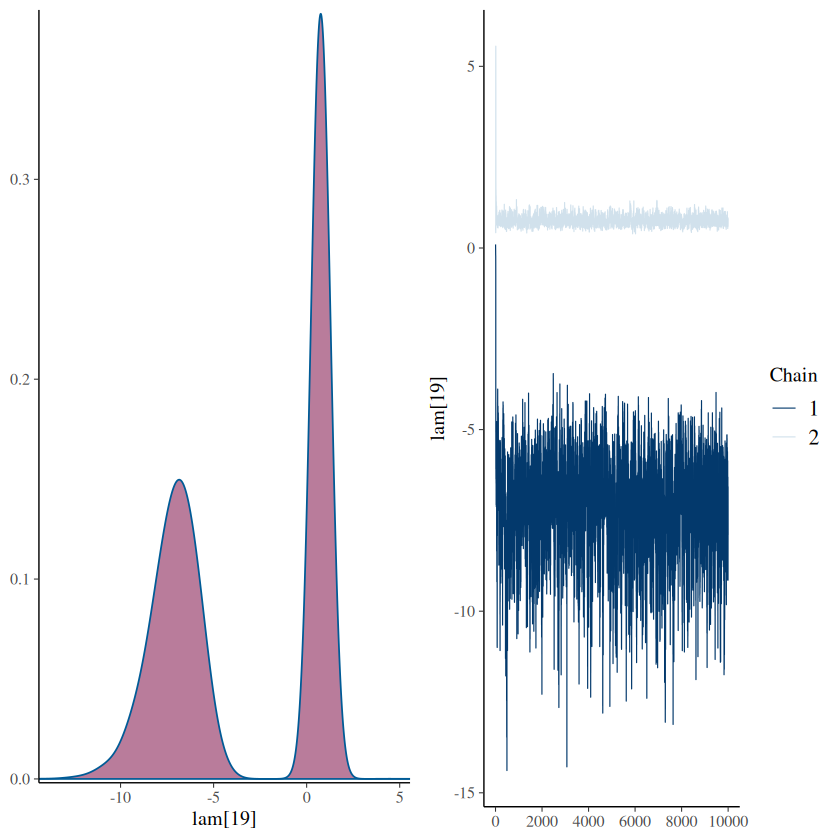

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]


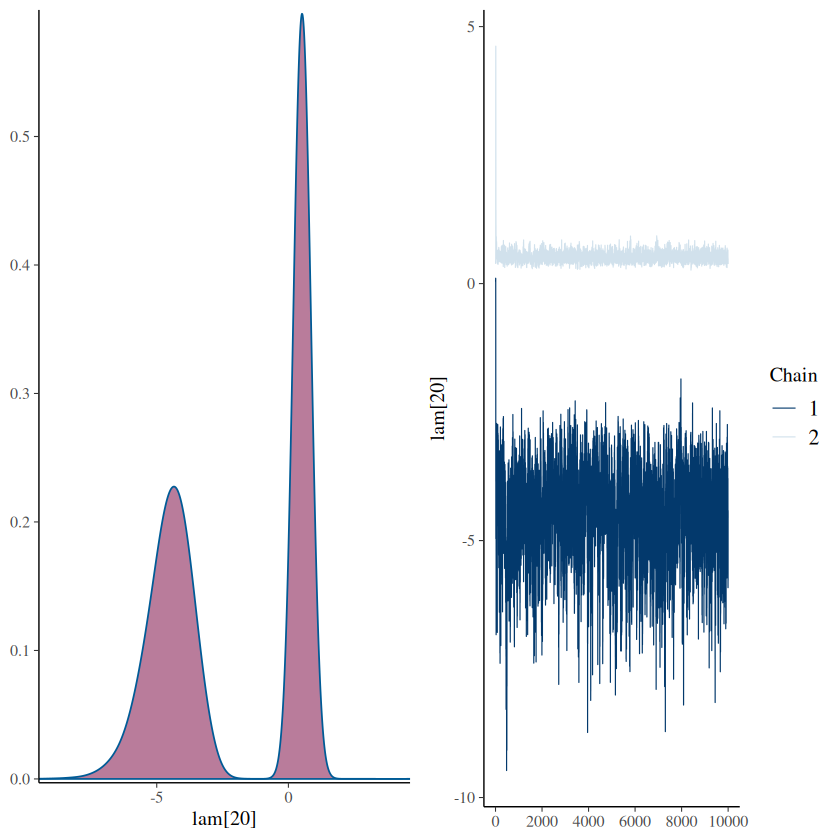

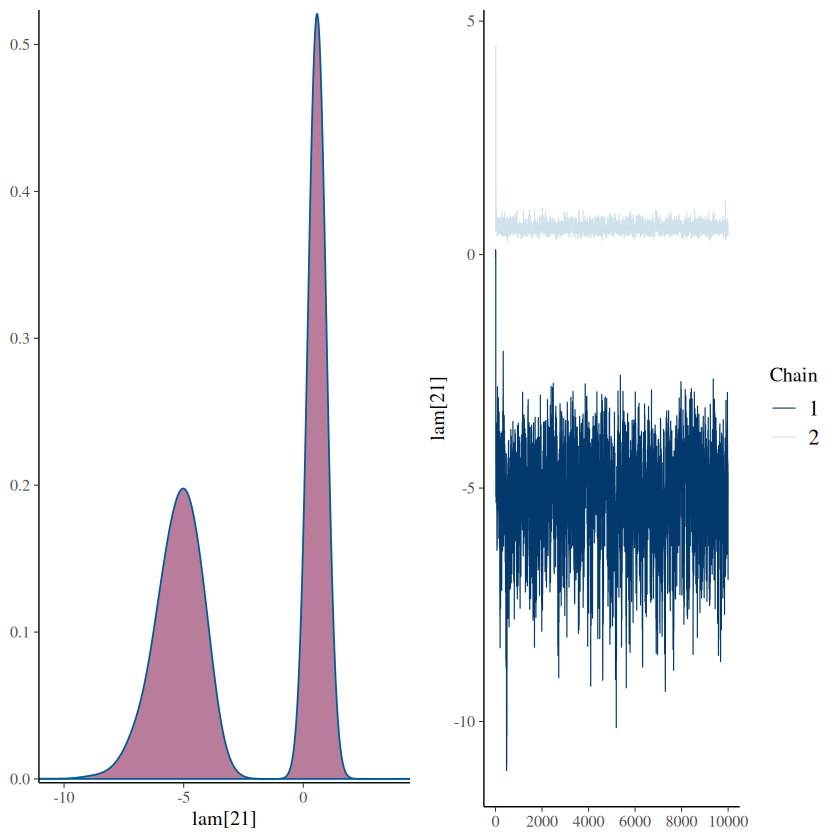

In [109]:
lapply(pars, function(x) {mcmc_combo(draws, pars = x)})

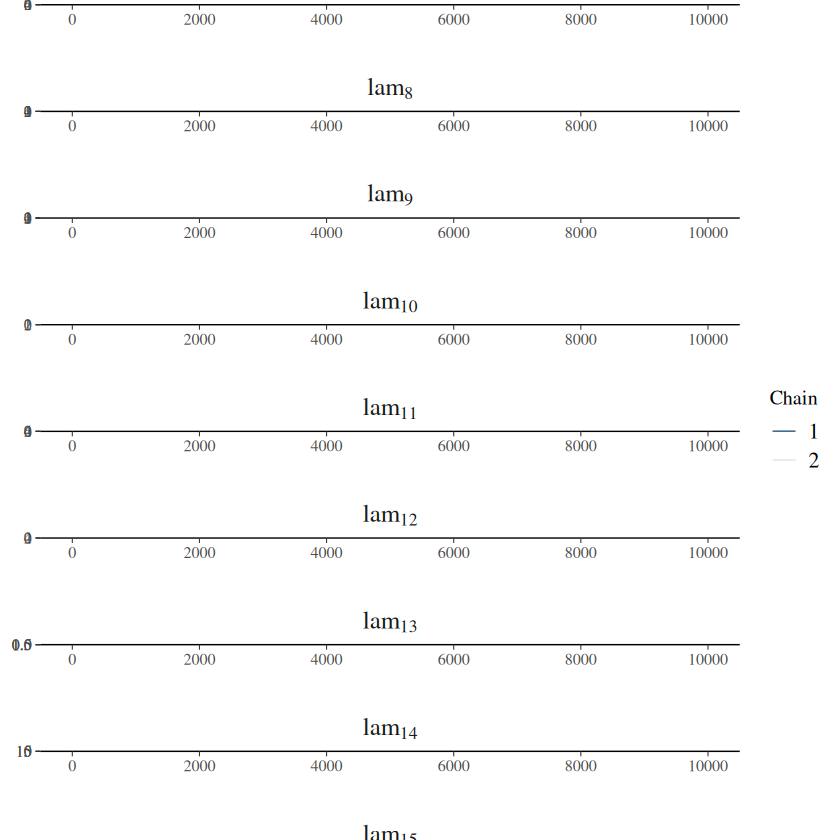

In [101]:
color_scheme_set("mix-blue-pink")
p <- mcmc_trace(
    draws,
    pars = grep("lam", names(draws), value = TRUE),
    n_warmup = 2000,
    facet_args = list(
        ncol = 1,
        labeller = label_parsed
    ),
)
p + facet_text(size = 15)

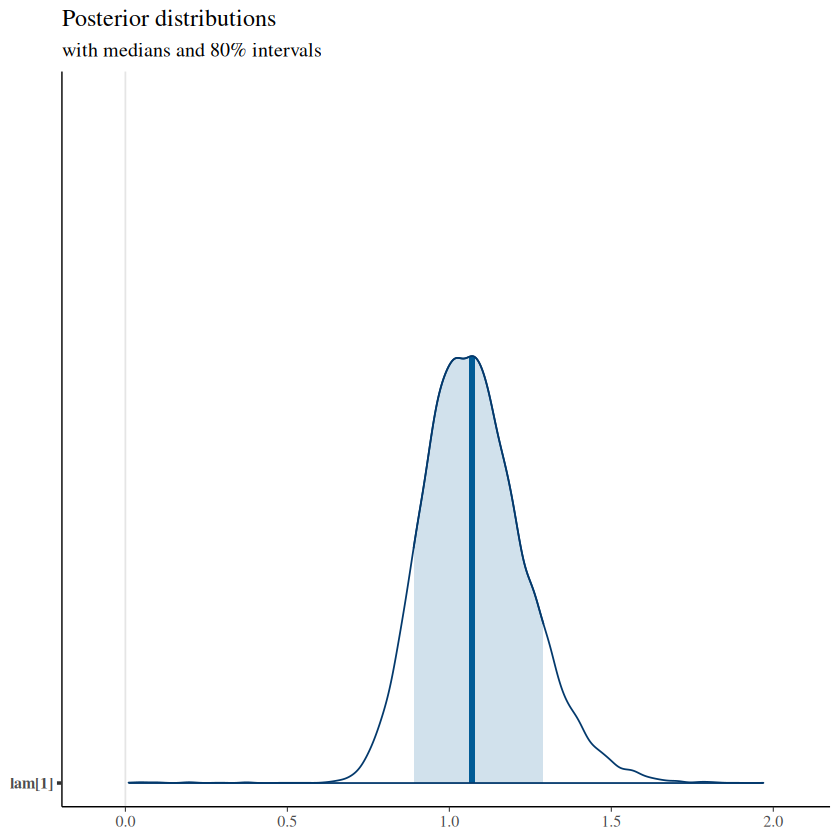

In [61]:
plot_title <- ggtitle("Posterior distributions",
                      "with medians and 80% intervals")
mcmc_areas(draws,
           pars = "lam[1]",
           prob = 0.8) + plot_title